In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pylab as plt
import geopandas
from sklearn import metrics

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
data = pd.read_csv("data_after_clean.csv")
data1 = pd.read_csv("datall_with_all_new.csv")

In [6]:
data

,Unnamed: 0,Player,Age,Nation,Position,Club,Birthday,Astrology,Foot,Height,...,TransferMarket Value,predicted_rate,Game Rating,Fotball Critic rating,FMyear,rate avg,ratio predicted,label,numeric position,numeric foot
0,0,Cristian Alvarez,27,Argentina,Defensive Midfielders,Zaragoza,11.0,Scorpio,Right,186,...,475000.0,75.0,79.0,72.0,2014.0,75.5,1.006667,1,3,2
1,1,Pablo Perez,27,Spain,Central Midfielders,Newell's,8.0,Leo,Right,179,...,700000.0,75.0,76.0,55.0,2014.0,65.5,0.873333,0,2,2
2,2,Franco Jara,27,Argentina,Strikers,FC Dallas,7.0,Cancer,Right,182,...,2400000.0,70.0,74.0,91.0,2014.0,82.5,1.178571,1,9,2
3,3,Damian Martinez,27,Argentina,Goalkeepers,Rosario Central,1.0,Aquarius,Right,180,...,30000000.0,78.0,74.0,99.0,2014.0,74.0,0.948718,1,4,2
4,4,La De,28,Brazil,Central Attacking Midfielders,FC Lorient,2.0,Pisces,Either,190,...,1000000.0,76.0,68.0,70.0,2017.0,69.0,0.907895,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,3130,Joaquin Rikemberg,17,Brazil,Central Attacking Midfielders,"Feb 24, 2021",1.0,Capricorn,Either,180,...,50000.0,77.0,68.0,68.0,2018.0,68.0,0.883117,0,0,0
3131,3131,Joaquin Rikemberg,17,Brazil,Central Attacking Midfielders,"Feb 24, 2021",1.0,Capricorn,Either,180,...,50000.0,79.0,68.0,68.0,2019.0,68.0,0.860759,0,0,0
3132,3132,Kays Ruiz,17,Brazil,Left Wingers,Paris SG,8.0,Virgo,Right,173,...,3000000.0,76.0,65.0,68.0,2019.0,66.5,0.875000,0,6,2
3133,3133,Mustafa Kapi,17,Argentina,Central Midfielders,LOSC,8.0,Leo,Right,171,...,300000.0,77.0,63.0,68.0,2019.0,65.5,0.850649,0,2,2


In [7]:
data.isnull().sum(axis = 0)

Unnamed: 0                0
Player                    0
Age                       0
Nation                    0
Position                  0
Club                      0
Birthday                  0
Astrology                 0
Foot                      0
Height                    0
Wage                      0
youth_value               0
Game Value                0
TransferMarket Value     12
predicted_rate            0
Game Rating               0
Fotball Critic rating     0
FMyear                    0
rate avg                  0
ratio predicted           0
label                     0
numeric position          0
numeric foot              0
dtype: int64

In [8]:
data['TransferMarket Value'].fillna(data['TransferMarket Value'].median(), inplace=True)



In [9]:
data.isnull().sum(axis = 0)

Unnamed: 0               0
Player                   0
Age                      0
Nation                   0
Position                 0
Club                     0
Birthday                 0
Astrology                0
Foot                     0
Height                   0
Wage                     0
youth_value              0
Game Value               0
TransferMarket Value     0
predicted_rate           0
Game Rating              0
Fotball Critic rating    0
FMyear                   0
rate avg                 0
ratio predicted          0
label                    0
numeric position         0
numeric foot             0
dtype: int64

<AxesSubplot:>

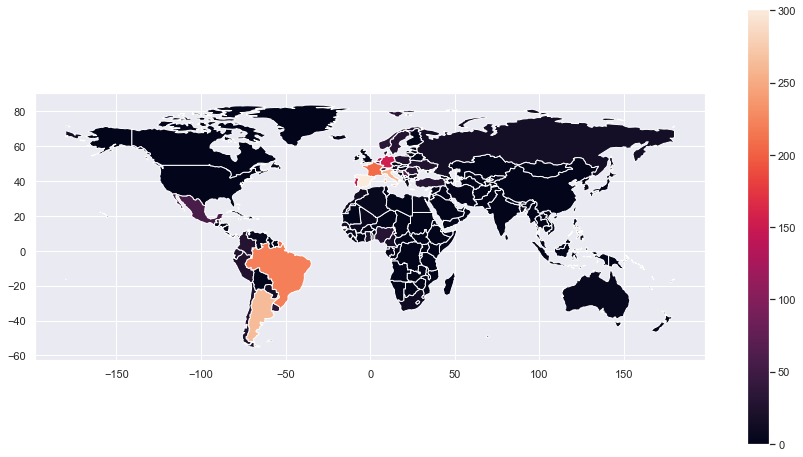

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world["name"] != "Antarctica"]
players_from_country = []
for idx, cnt in enumerate(world.name):
    players = 0
    for player_cnt in data.Nation:
        if cnt == player_cnt:
            players += 1
    
    players_from_country.append(players)
world["players_from_country"] = players_from_country
world.plot(column="players_from_country", legend=True)

<AxesSubplot:>

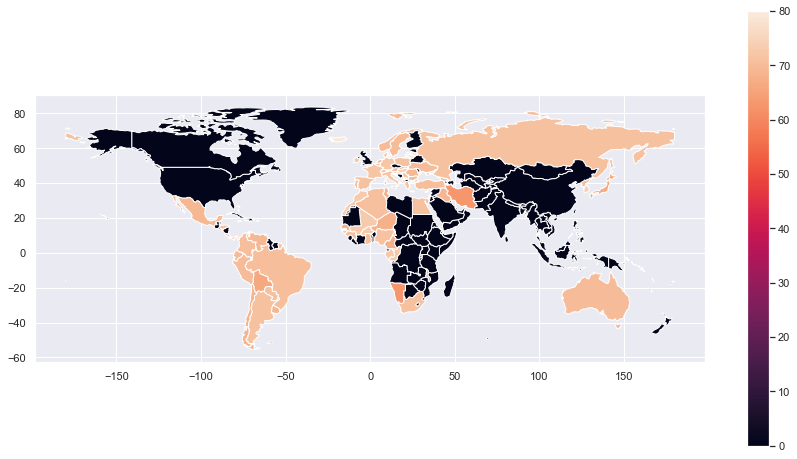

In [26]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world["name"] != "Antarctica"]
players_from_country = []
rate = data["rate avg"]
for idx, cnt in enumerate(world.name):
    players = 0
    i=0
    count = 0
    for player_cnt in data.Nation:
        if cnt == player_cnt:
            players += rate[i]
            count += 1
        i += 1
    if count != 0:    
        players = players/count
    players_from_country.append(players)
world["players_from_country"] = players_from_country
world.plot(column="players_from_country", legend=True)

<AxesSubplot:>

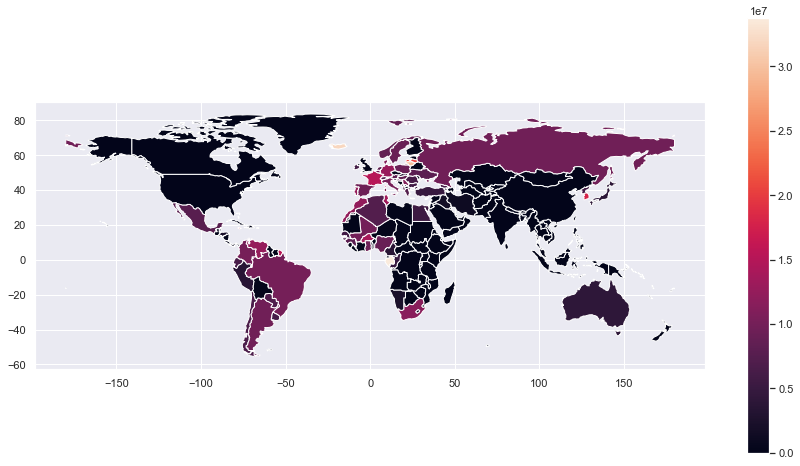

In [27]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[world["name"] != "Antarctica"]
players_from_country = []
value = data["TransferMarket Value"]
for idx, cnt in enumerate(world.name):
    players = 0
    i=0
    count = 0
    for player_cnt in data.Nation:
        if cnt == player_cnt:
            players += value[i]
            count += 1
        i += 1
    if count != 0:    
        players = players/count
    players_from_country.append(players)
world["players_from_country"] = players_from_country
world.plot(column="players_from_country", legend=True)

In [28]:
def plot_variable_against_rate(field):
    if (data.dtypes[data.dtypes.index==field]=='object').bool():
        sns.boxplot(x=field, y="rate avg",
            data=data)
        plt.xticks(rotation=90)
        plt.title(f''' Variable '{field}'by rate avg''')
        sns.set(rc = {'figure.figsize':(15,8)})
    else:
        sns.scatterplot(data=data, x=field, y="rate avg")
        plt.title(f''' Variable '{field}'By rate avg''')
        sns.set(rc = {'figure.figsize':(15,8)})

In [29]:
def plot_variable_against_rate_ratio(field):
    if (data.dtypes[data.dtypes.index==field]=='object').bool():
        sns.boxplot(x=field, y="ratio predicted",
            data=data)
        plt.xticks(rotation=90)
        plt.title(f''' Variable '{field}'by ratio predicted''')
        sns.set(rc = {'figure.figsize':(15,8)})
    else:
        sns.scatterplot(data=data, x=field, y="ratio predicted")
        plt.title(f''' Variable '{field}'By ratio predicted''')
        sns.set(rc = {'figure.figsize':(15,8)})

In [30]:
def plot_variable_against_predicted(field):
    if (data.dtypes[data.dtypes.index==field]=='object').bool():
        sns.boxplot(x=field, y="ratio predicted",
            data=data)
        plt.xticks(rotation=90)
        plt.title(f''' Variable '{field}' By ratio predictede''')
        sns.set(rc = {'figure.figsize':(15,8)})
    else:
        sns.scatterplot(data=data, x=field, y="ratio predicted")
        plt.title(f''' Variable '{field}' By ratio predicted''')
        sns.set(rc = {'figure.figsize':(15,8)})

In [31]:
def plot_variable_against_value(field):
    if (data.dtypes[data.dtypes.index==field]=='object').bool():
        sns.boxplot(x=field, y="TransferMarket Value",
            data=data)
        plt.xticks(rotation=90)
        plt.title(f''' Variable '{field}' By value''')
        sns.set(rc = {'figure.figsize':(15,8)})
    else:
        sns.scatterplot(data=data, x=field, y="TransferMarket Value")
        plt.title(f''' Variable '{field}' By value''')
        sns.set(rc = {'figure.figsize':(15,8)})

In [32]:
data.columns

Index(['Unnamed: 0', 'Player', 'Age', 'Nation', 'Position', 'Club', 'Birthday',
       'Astrology', 'Foot', 'Height', 'Wage', 'youth_value', 'Game Value',
       'TransferMarket Value', 'predicted_rate', 'Game Rating',
       'Fotball Critic rating', 'FMyear', 'rate avg', 'ratio predicted',
       'label', 'numeric position', 'numeric foot'],
      dtype='object')

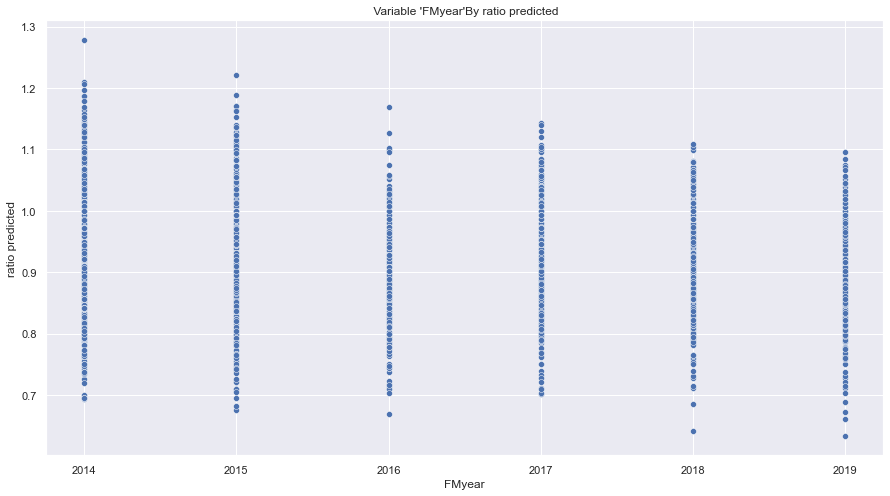

In [33]:
plot_variable_against_rate_ratio("FMyear")

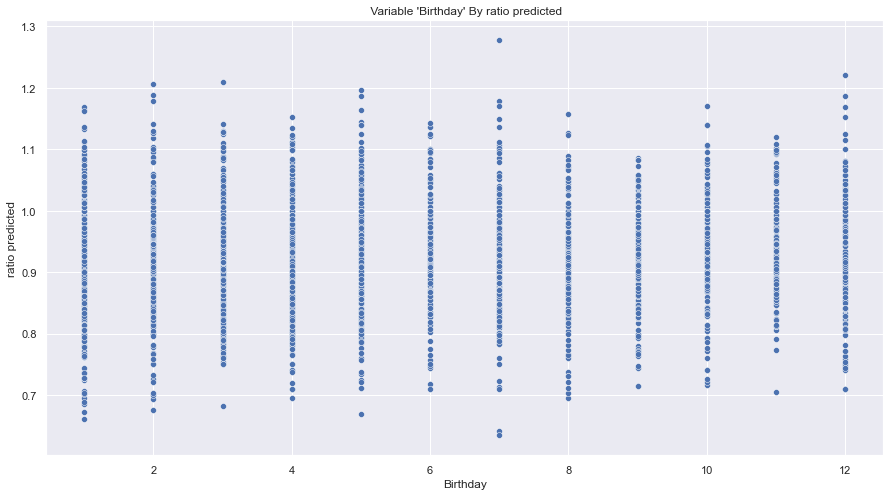

In [34]:
plot_variable_against_predicted("Birthday")

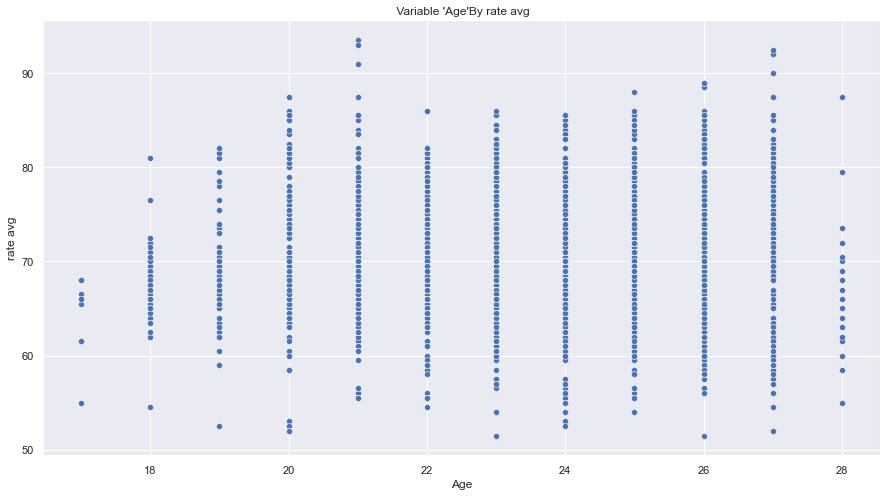

In [35]:
plot_variable_against_rate("Age")

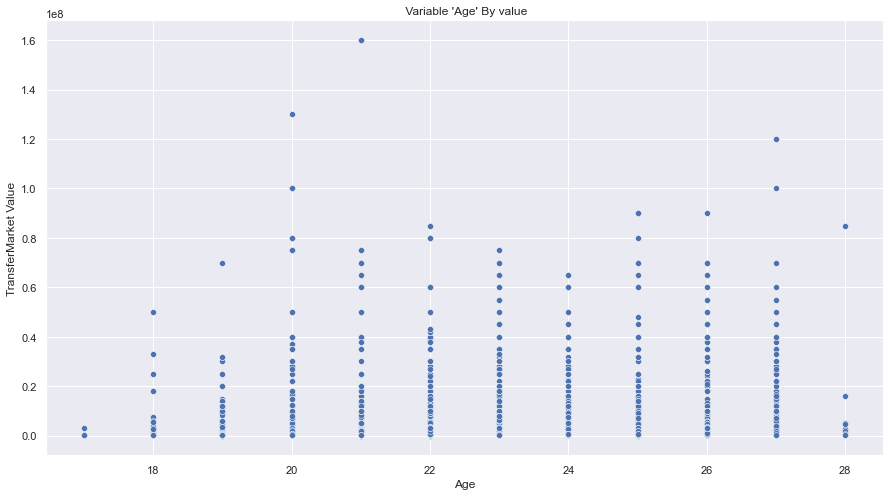

In [36]:
plot_variable_against_value("Age")

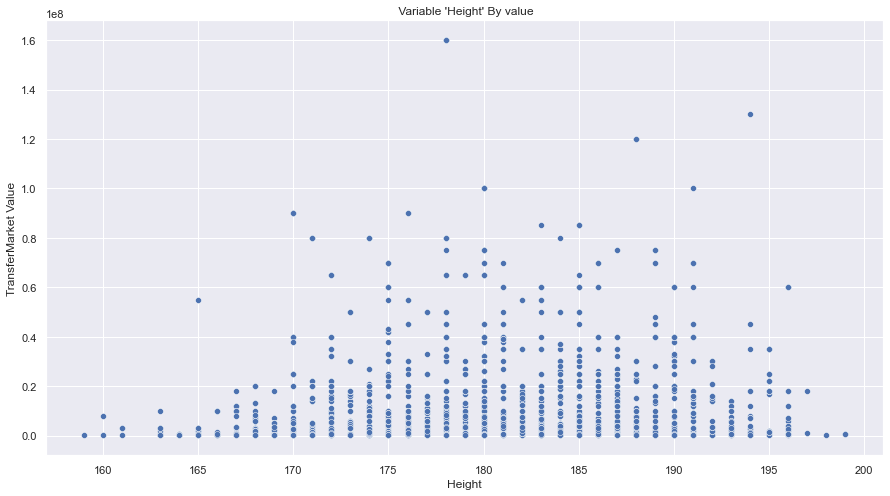

In [37]:
plot_variable_against_value("Height")

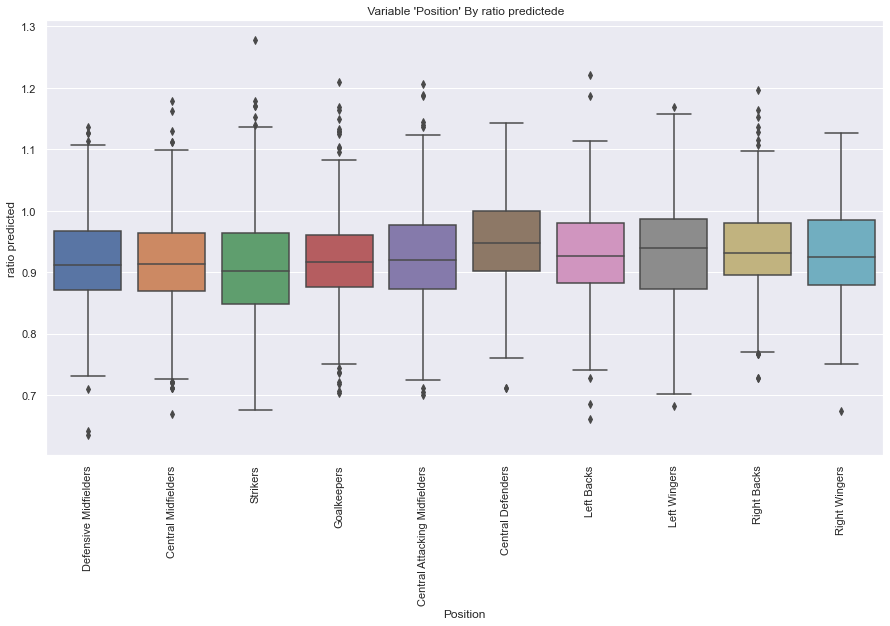

In [23]:
plot_variable_against_predicted("Position")

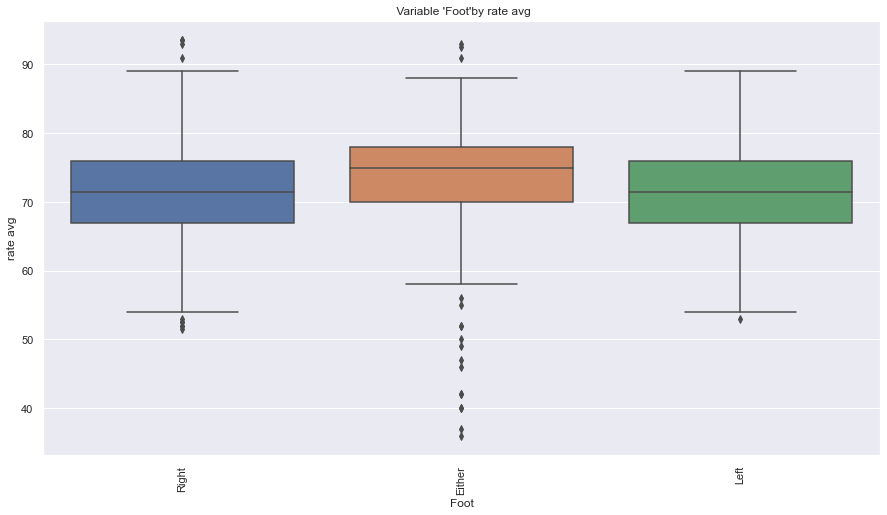

In [61]:
plot_variable_against_rate("Foot")

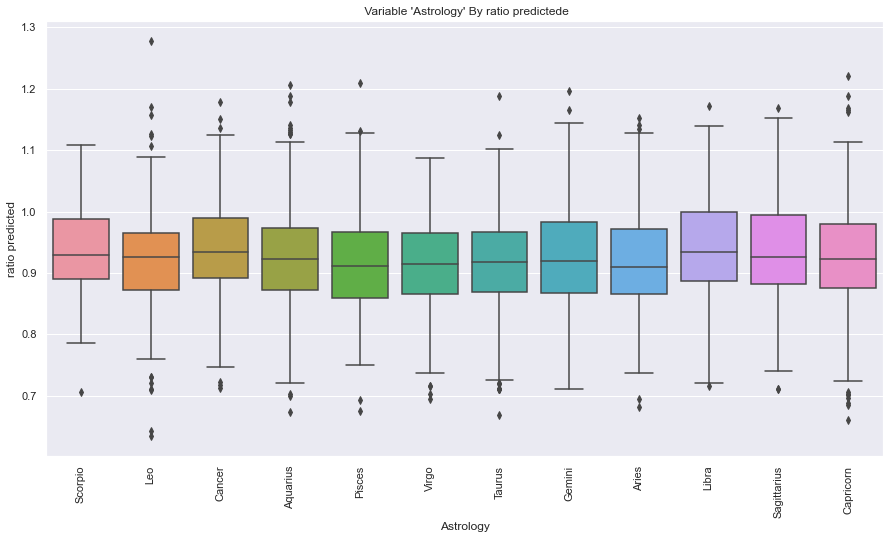

In [62]:
plot_variable_against_predicted("Astrology")

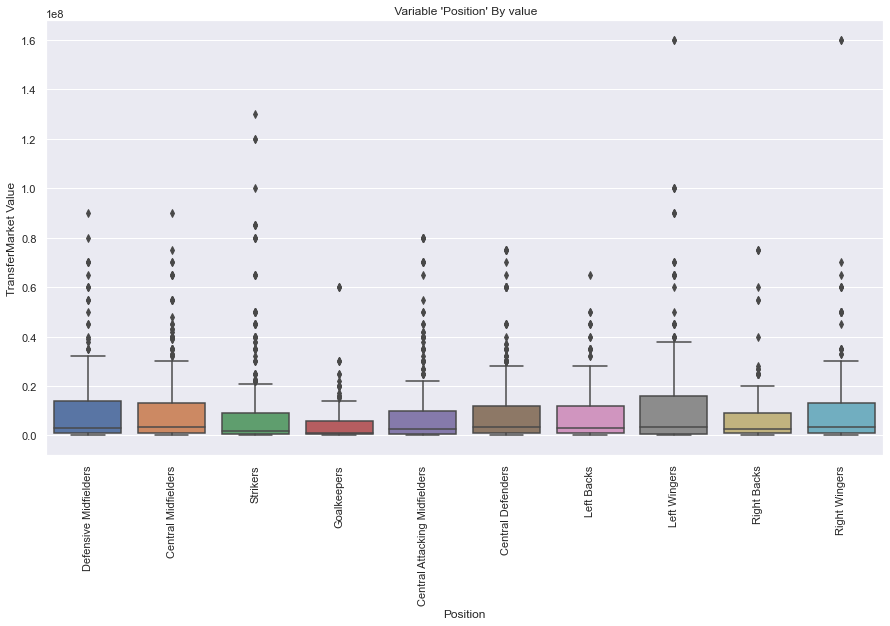

In [69]:
plot_variable_against_value("Position")

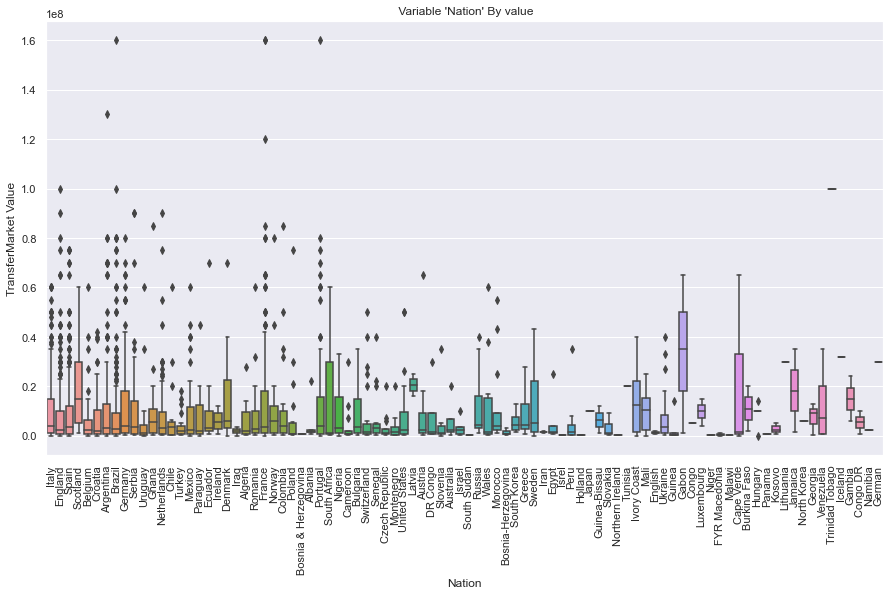

In [74]:
plot_variable_against_value("Nation")

In [78]:
feature_cols = ["Age", "predicted_rate","numeric position","numeric foot","Height","Birthday"]
X = data[feature_cols]
y = data.label

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [80]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [76]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[294, 133],
       [157, 200]])

Text(0.5, 510.88, 'Predicted label')

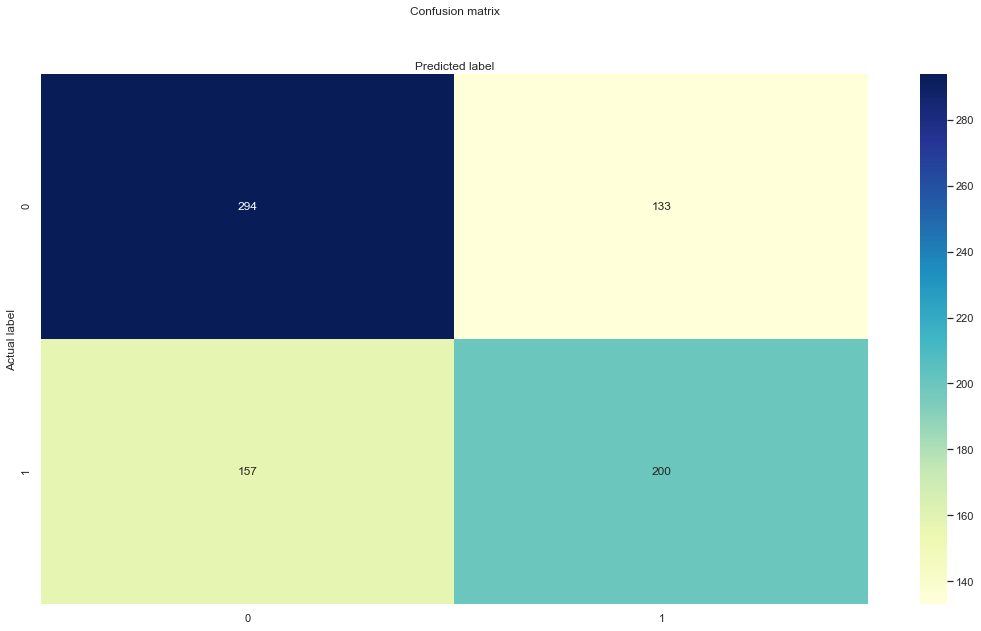

In [77]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
data.dtypes

Unnamed: 0                 int64
Player                    object
Age                        int64
Nation                    object
Position                  object
Club                      object
Birthday                 float64
Astrology                 object
Foot                      object
Height                     int64
Wage                      object
youth_value               object
Game Value                object
TransferMarket Value     float64
predicted_rate           float64
Game Rating              float64
Fotball Critic rating    float64
FMyear                   float64
rate avg                 float64
ratio predicted          float64
label                      int64
numeric position           int64
numeric foot               int64
dtype: object

In [81]:
data = pd.read_csv("data_after_clean 2015.csv")

In [82]:
feature_cols = [ "Age","predicted_rate","numeric position","numeric foot","Height","Birthday"]
X = data[feature_cols]
y = data.label
# instantiate the model (using the default parameters)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 58,  42],
       [ 33, 106]])

Text(0.5, 510.88, 'Predicted label')

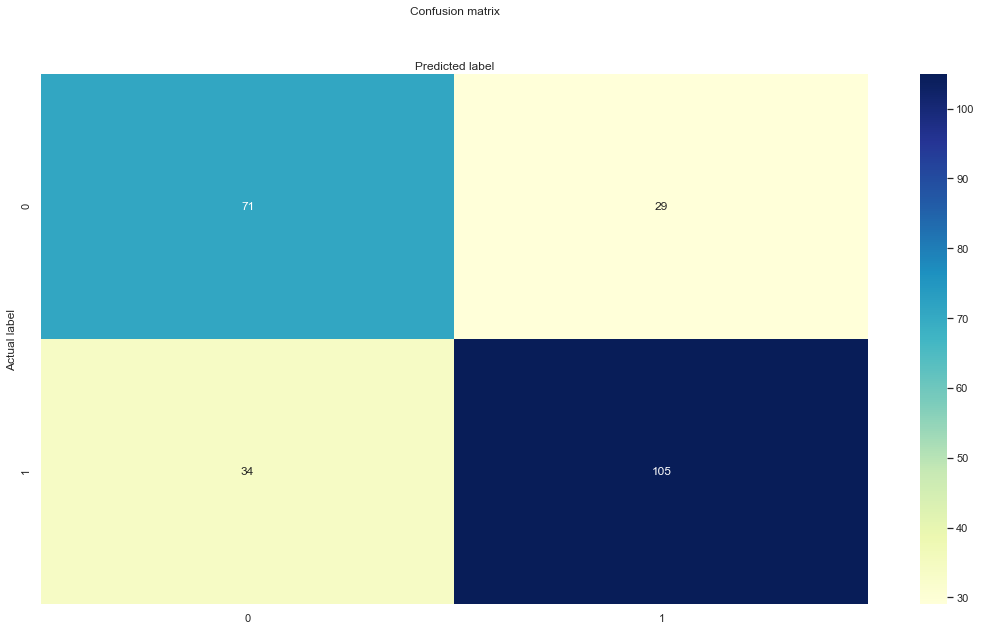

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')